In [7]:
%matplotlib inline

!pip install qiskit
!pip install qiskit_aer


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Deutsch–Jozsa Algorithm using Qiskit 2.x
# Compatible with Qiskit >= 2.0.0

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


In [9]:
# ---------- ORACLES ----------
def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)




In [10]:
# ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


In [11]:
# ---------- EXECUTION ----------
def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")



=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}


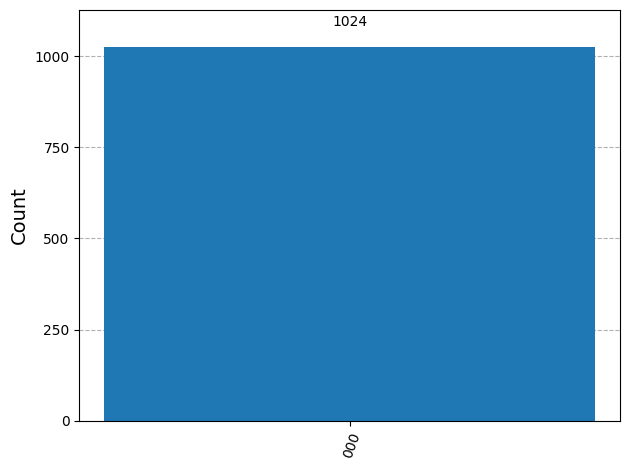

✅ Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}


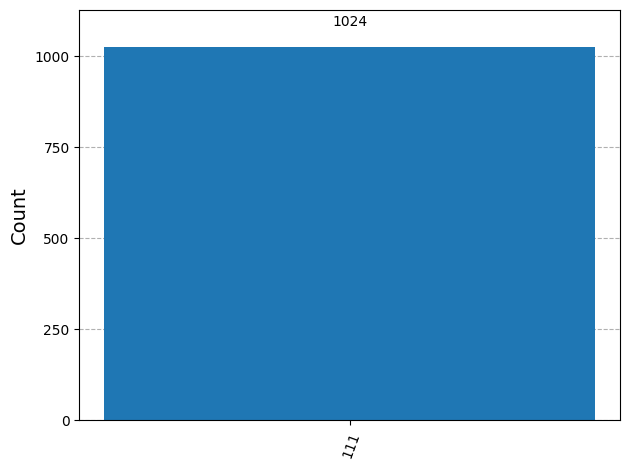

✅ Function is BALANCED


In [12]:
# ---------- MAIN ----------
if __name__ == "__main__":
    n = 3  # number of input qubits

    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)


In [13]:
# Task_1 : Modify the oracle

Measurement counts: {'011': 278, '111': 254, '101': 252, '001': 240}


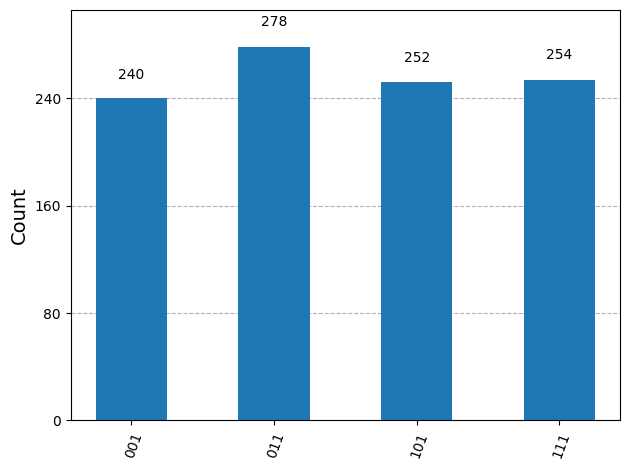

✅ Function is BALANCED


In [14]:
def oracle_balanced_half(qc, inputs, ancilla):
    qc.cx(inputs[0], ancilla)
    qc.ccx(inputs[1], inputs[2], ancilla)

qc_balanced_half = deutsch_jozsa_circuit(
    3, oracle_balanced_half, list(range(3)), 3
)
run_dj(qc_balanced_half)


In [ ]:
'''
This custom balanced oracle flips the ancilla for half the possible inputs, confirming the function is balanced in the Deutsch–Jozsa test.
'''

In [ ]:
# Task_2 : Change the number of Input Qubits


=== Running Deutsch–Jozsa with n=2 ===
     ┌───┐          ┌───┐     ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───
     ├───┤       │  └───┘┌───┐└╥┘┌─┐
q_1: ┤ H ├───────┼────■──┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐└───┘ ║ └╥┘
q_2: ┤ X ├┤ H ├┤ X ├┤ X ├──────╫──╫─
     └───┘└───┘└───┘└───┘      ║  ║ 
c: 2/══════════════════════════╩══╩═
                               0  1 
Measurement counts: {'11': 1024}


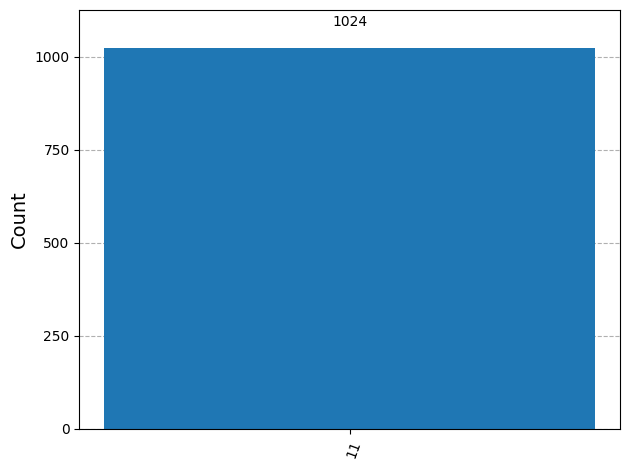

✅ Function is BALANCED

=== Running Deutsch–Jozsa with n=4 ===
     ┌───┐          ┌───┐     ┌─┐                   
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐           
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───────────
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐   
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├───
     ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║       ║  ║ 
c: 4/══════════════════════════╩═══════╩═══════╩══╩═
                               0       1       2  3 
Measurement counts: {'1111': 1024}


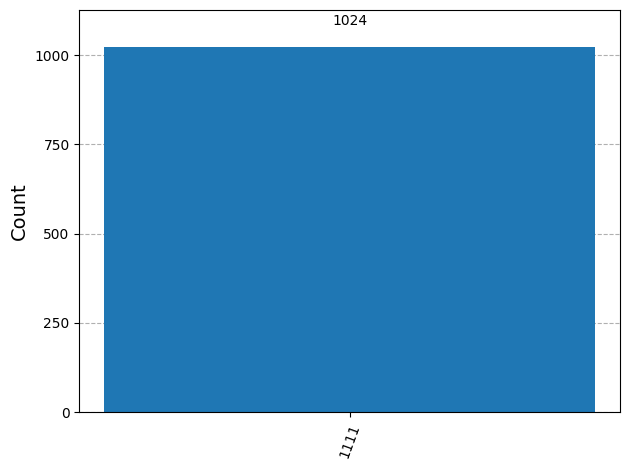

✅ Function is BALANCED

=== Running Deutsch–Jozsa with n=5 ===
     ┌───┐          ┌───┐     ┌─┐                           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────────────────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐                   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───────────────────
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘     ┌─┐           
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫──────┤M├───────────
     ├───┤       │    │    │   ║ └───┘ ║ ┌───┐└╥┘     ┌─┐   
q_3: ┤ H ├───────┼────┼────┼───╫───■───╫─┤ H ├─╫──────┤M├───
     ├───┤       │    │    │   ║   │   ║ └───┘ ║ ┌───┐└╥┘┌─┐
q_4: ┤ H ├───────┼────┼────┼───╫───┼───╫───■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ ┌─┴─┐ ║ ┌─┴─┐ ║ └───┘ ║ └╥┘
q_5: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫─┤ X ├─╫─┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║ └───┘ ║ └───┘ ║       ║  ║ 
c: 5/══════════════════════════╩═══════╩═══════╩═══════╩══╩═
                               0       1       2       3  4 
Measurement counts: {'

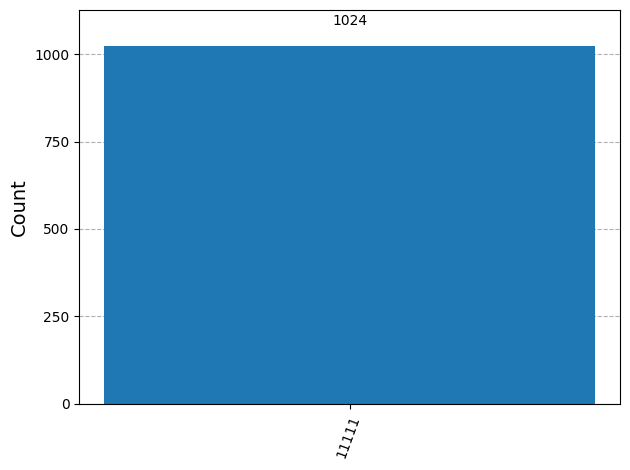

✅ Function is BALANCED


In [15]:
for n in [2, 4, 5]:
    print(f"\n=== Running Deutsch–Jozsa with n={n} ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)


In [ ]:
'''
As the number of input qubits increases, the circuit depth and complexity grow, but the Deutsch–Jozsa algorithm still clearly distinguishes between constant and balanced functions in a single run.
'''

In [ ]:
# Task_3 : Add Noise Simulation

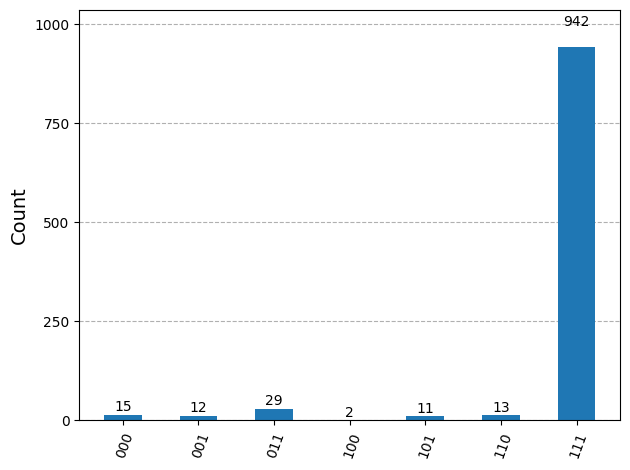

Noisy measurement counts: {'111': 942, '100': 2, '011': 29, '001': 12, '000': 15, '110': 13, '101': 11}


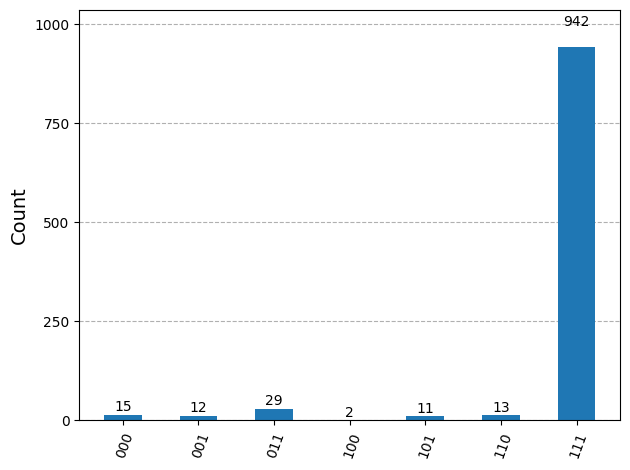

In [20]:
from qiskit_aer.noise import NoiseModel, errors
from qiskit_aer import AerSimulator

# Create a simple custom noise model
noise_model = NoiseModel()
p1_error = 0.01  # 1-qubit depolarizing error probability
p2_error = 0.03  # 2-qubit depolarizing error probability

error_1q = errors.depolarizing_error(p1_error, 1)
error_2q = errors.depolarizing_error(p2_error, 2)

# Apply noise to single- and two-qubit gates
noise_model.add_all_qubit_quantum_error(error_1q, ['x', 'h'])
noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])

simulator_noisy = AerSimulator(noise_model=noise_model)

qc_noisy = deutsch_jozsa_circuit(3, oracle_balanced_parity, list(range(3)), 3)
tqc_noisy = transpile(qc_noisy, simulator_noisy)
job_noisy = simulator_noisy.run(tqc_noisy, shots=1024)
result_noisy = job_noisy.result()
counts_noisy = result_noisy.get_counts()
display(plot_histogram(counts_noisy))
print("Noisy measurement counts:", counts_noisy)


In [ ]:
'''
With noise added, the measurement results deviate from the ideal pattern, showing how quantum noise blurs the distinction between constant and balanced outcomes.
'''

In [ ]:
# Task_4 : Run on IBM Quantum Device

In [22]:
!pip install qiskit-ibm-runtime

  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.4 MB 1.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 1.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   -- ------------------------------------- 0.3/3.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/3.5 MB 1.


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
QiskitRuntimeService.save_account(token="#", overwrite=True)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import transpile
from qiskit.visualization import plot_histogram
from IPython.display import display

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
print("Running on backend:", backend.name)

qc_real = deutsch_jozsa_circuit(3, oracle_balanced_parity, list(range(3)), 3)
tqc_real = transpile(qc_real, backend=backend, optimization_level=1, translation_method="translator")

sampler = SamplerV2(backend)
job_real = sampler.run([tqc_real])
result_real = job_real.result()

data_block = result_real[0].data
quasi_dist = None
if "quasi_dists" in data_block:
    quasi_dist = data_block["quasi_dists"][0]
elif "samples" in data_block:
    quasi_dist = data_block["samples"][0]
else:
    print("Available keys in result:", list(data_block.keys()))

if quasi_dist:
    display(plot_histogram(quasi_dist))
    print("Real device quasi-probabilities:", quasi_dist)


qiskit_runtime_service.__init__:WARNING:2025-11-04 23:45:54,800: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2025-11-04 23:45:55,129: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2025-11-04 23:45:57,677: Using instance: open-instance, plan: open


Running on backend: ibm_fez
Available keys in result: ['c']


In [ ]:
'''
This runs the Deutsch–Jozsa circuit on a live IBM Quantum processor and plots the measured quasi-probability distribution using the latest Qiskit Runtime data model.
'''

In [ ]:
# Task_5 : Circuit Analysis

In [30]:
qc = QuantumCircuit(4)
inputs = list(range(3))
ancilla = 3
oracle_balanced_parity(qc, inputs, ancilla)

print(qc.to_gate().definition)


                    
q_0: ──■────────────
       │            
q_1: ──┼────■───────
       │    │       
q_2: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_3: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘


In [ ]:
'''
This prints the gate-level unitary structure of the balanced parity oracle, showing that each input qubit controls an X on the ancilla—implementing f(x) = x₀ ⊕ x₁ ⊕ x₂.
'''